# Synthetic Schedules Generation

In [1]:
from pathlib import Path

import pandas as pd

from caveat.data.synth import ActivityGen
from caveat.data.utils import generate_population, trace_to_pam
from caveat.evaluate.describe.times import (
    joint_time_distributions_plot,
    times_distributions_plot,
)
from caveat.evaluate.describe.transitions import sequence_prob_plot

In [2]:
write_path = Path("tmp/synthetic_population.csv")

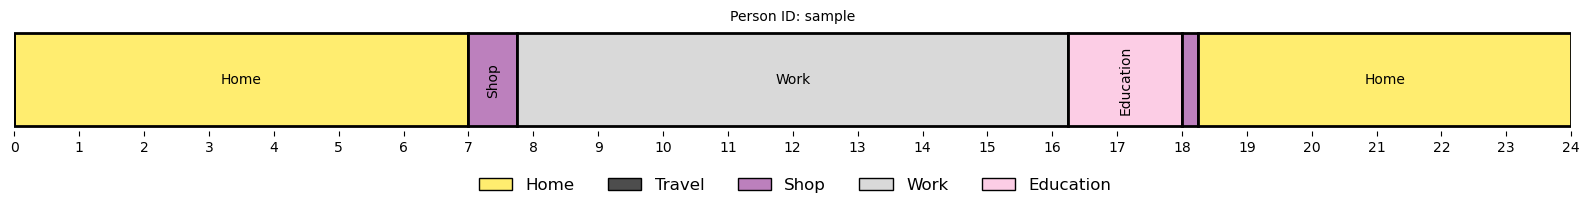

In [3]:
# Example
generator = ActivityGen()
generator.build()

trace = generator.run()
plan = trace_to_pam(trace, generator.map)
plan.plot()

In [ ]:
population = generate_population(gen=generator, size=100)
population.act = population.act.map(generator.map)
population = population[["pid", "act", "start", "end", "duration"]]
population

In [ ]:
write_path.parent.mkdir(exist_ok=True)
population.to_csv(write_path, index=False)

In [ ]:
def describe_col(population, col: str) -> pd.DataFrame:
    description = population.groupby("act")[col].describe()[
        ["count", "mean", "std", "min", "max"]
    ]
    description["attribute"] = col
    return description


def describe_cols(population, cols: list[str]) -> pd.DataFrame:
    description = pd.concat(
        [describe_col(population, c) for c in cols], ignore_index=False
    )
    description = description.reset_index().set_index(["attribute", "act"])
    return description


describe_cols(population, ["start", "end", "duration"]).round()

In [ ]:
def time_distributions(population: pd.DataFrame, mapping: dict):
    starts = {k: [] for k in mapping.values()}
    ends = {k: [] for k in mapping.values()}
    durations = {k: [] for k in mapping.values()}
    for act, acts in population.groupby("act"):
        starts[act] = list(acts.start)
        ends[act] = list(acts.end)
        durations[act] = list(acts.duration)
    return starts, ends, durations

In [ ]:
starts, ends, durations = time_distributions(population, generator.map)

In [ ]:
_ = times_distributions_plot(population, ys={})

In [ ]:
_ = joint_time_distributions_plot(population, ys={})

In [ ]:
_ = sequence_prob_plot(population, ys={}, figsize=(8, 6))